In [1]:
import pyspark.sql.functions as f
from pyspark.sql.types import ArrayType, StringType, IntegerType
import pandas as pd
pd.options.display.max_columns = None

In [2]:
def read_dataset_for_date(date):
    return spark.read\
        .option("header", True)\
        .csv('./datasets_sample/covid19/{}_Coronavirus_Tweets.CSV'.format(date))

In [3]:
dates = ['2020-03-31', '2020-04-01', '2020-04-02', '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-10',
         '2020-04-12', '2020-04-14', '2020-04-16', '2020-04-20', '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-30']

# cluster data
# dates = ['2020-03-29', '2020-04-07', '2020-04-16', '2020-04-25', '2020-03-30', '2020-04-08', '2020-04-17', '2020-04-26', '2020-03-31', '2020-04-09', '2020-04-18', '2020-04-27', '2020-04-01', '2020-04-10', '2020-04-19', '2020-04-28',
#          '2020-04-02', '2020-04-11', '2020-04-20', '2020-04-29', '2020-04-03', '2020-04-12', '2020-04-21', '2020-04-30', '2020-04-04', '2020-04-13', '2020-04-22', '2020-04-05', '2020-04-14', '2020-04-23', '2020-04-06', '2020-04-15', '2020-04-24']


In [4]:
tweets = None
for date in dates:
    tweets_for_date = read_dataset_for_date(date)
    if not tweets:
        tweets = tweets_for_date
    else:
        tweets = tweets.union(tweets_for_date)

In [5]:
tweets.count()

14067525

## Question 1

### Attempt 1

In [14]:
text_df = tweets.filter("text is not null").select("text")

parts_df = text_df.withColumn("parts", f.explode(
    f.split(f.col('text'), ' '))).select("parts")

hashtags_df = parts_df.filter("parts like '#%'")

hashtags_df.groupBy("parts")\
    .count()\
    .sort('count', ascending=False)\
    .limit(15)\
    .toPandas()

,parts,count
0,#COVID19,1587388
1,#coronavirus,1161946
2,#Covid_19,404820
3,#Coronavirus,381858
4,#covid19,257981
5,#Covid19,208681
6,#COVID19.,127114
7,#COVIDー19,83863
8,#CoronavirusPandemic,63875
9,#coronavirus.,61082


### Investigating dataset issues

**Problem #1**: Tweet content starts in the first column and overrides other columns until its end. Right after, there is a Twitter% like string, showing the platform that the tweet was posted.

In [32]:
tweets.filter("user_id like 'Twitter%'").limit(5).toPandas()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,La opinión de Federico @Berrueto en #MILENIOAl...,Twitter Media Studio,None,None,None,FALSE,FALSE,7,0,None,None,None,4532232,162,None,2009-03-17T22:26:38Z,TRUE,es,None,None,None,None
1,https://t.co/ufBtMLTWiI #NoticiasTVN #COVID19 ...,Twitter Media Studio,None,None,None,FALSE,FALSE,18675,4,None,None,None,809756,1611,None,2011-05-16T14:51:19Z,TRUE,es,None,None,None,None
2,"#البيان_القارئ_دائما https://t.co/EWvEvNfNt8""",Twitter Media Studio,None,None,None,FALSE,FALSE,2453,2,None,None,None,754538,70,None,2010-02-14T18:20:05Z,TRUE,ar,None,None,None,None
3,#COVID19 #Coronavirus #MéxicoUnido #SanaDistan...,Twitter Media Studio,None,None,None,FALSE,FALSE,7196,35,None,None,None,441972,25039,None,2009-08-26T17:04:56Z,TRUE,es,None,None,None,None
4,"#VirgenMaría #Covid19 #28Mar.""",Twitter for Android,None,None,None,FALSE,FALSE,1355,0,None,None,None,407,359,None,2010-02-05T05:37:47Z,FALSE,es,None,None,None,None


In [18]:
tweets.filter("source like 'Twitter%' and created_at not like '20%'").limit(5).toPandas()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,qu'en ce moment,alors que le monde entier se bat contre la te...,les français,eux,ne se battent que contre une simple #grippett...,Twitter Web App,None,None,None,FALSE,...,11,None,None,None,1512,4256,None,2019-07-10T14:46:39Z,FALSE,fr
1,&gt;Cualquier virus del género #Coronavirus,incluyendo los 7 que infectan al ser humano (...,no solo existe el #SARSCoV2,entérate),son agentes que se trabajan en laboratorios d...,Twitter for Android,1244710485108445185,1199596563766665217,TheStrayWolf2,FALSE,...,6,None,None,None,272,114,None,2019-11-09T02:33:30Z,FALSE,es
2,Americans are scared,sick&amp;dying and chump is a narcissistic,lying,disgusting,"traitor pig 😡""",Twitter for Android,None,None,None,FALSE,...,0,None,None,None,6750,7342,None,2016-01-09T12:22:19Z,FALSE,en
3,Also on Monday,one death reported in Hubei Province,and 44 new suspected cases,all imported ones,were reported on the mainland. #coronavirus h...,Twitter Web App,None,None,None,FALSE,...,9,None,None,None,4334451,523,None,2009-11-05T20:30:10Z,TRUE,en
4,Italia ha registrado en el último día mil 648 ...,la cifra más baja de los últimos 20 días,los muertos ascendieron a 11 mil 591,con 812 más respecto al domingo,según datos de hoy de Protección Civil ⬇⬇ htt...,Twitter Web App,None,None,None,FALSE,...,1,None,None,None,52299,1008,None,2010-08-09T02:58:31Z,FALSE,es


In [19]:
tweets.filter("is_retweet like 'Twitter%' and created_at not like '2020-%'").limit(5).toPandas()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,key picks include: Infosys,Bharti,ICICI Bank,Axis Bank,ITC,UNSP,UTCEM,IGL,CDSL,"CIFC. https://t.co/Snj4S8aKZ2""",...,192993048,IndiaER,FALSE,FALSE,11,1,None,None,None,30772
1,Bogotá (56),Valle (13),Antioquia (10),Huila (5),Cundinamarca (4),Cartagena (3),Santa Marta (1),Boyacá (1),Barranquilla (1),Caldas (1) y Norte de Santander (1). https://t...,...,None,None,FALSE,FALSE,2087,1,None,None,None,12011
2,#God,#love,#light,#truth,#channel,#consciousness,#Corona,#Coronavirustruth,#coronavirus,"#CoronavirusOutbreak""",...,None,None,FALSE,FALSE,3734,0,None,None,None,563
3,There will be no wars,no segregation,no hatred,no crimes,no envy,no jealousy,no selfishness,no greed,no oppression .....when love is real and unco...,"everything bad disappears ...""",...,None,None,FALSE,FALSE,20925,1,None,None,None,3256
4,#Russia,#COVID,#COVIDー19,#COVID19,#Regulation,#Bitcoin,#bitcoinnews,#law,#government,"#coronavirus https://t.co/Re7wTnLDgj""",...,None,None,FALSE,FALSE,31,1,None,None,None,191


**Problem 2**: Try to find a reliable way to filter data. The best way found is to check if created_at starts with 2020.

In [33]:
tweets.filter("created_at like '2020-%'").limit(20).toPandas()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1244776423073542144,2722502906,2020-03-31T00:00:00Z,GradaNorteMX,Cuando mejor iban las cosas en el circuito de ...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,1244776423593775105,860252856829587457,2020-03-31T00:00:00Z,IMSS_SanLuis,Para prevenir el COVID-19 la distancia es impo...,TweetDeck,None,None,None,FALSE,FALSE,300,0,None,None,None,1012,41,None,2017-05-04T22:00:38Z,FALSE,es
2,1244776422037692417,24969337,2020-03-31T00:00:00Z,Milenio,"""▶ """"Es deseable que en este momento",AMLO se tome las cosas en serio y seguramente...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,1244776422079705092,91430932,2020-03-31T00:00:00Z,NewsweekEspanol,“Tú eres tu pareja sexual más segura”: la guía...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,1244776422209536002,299693451,2020-03-31T00:00:00Z,tvnnoticias,Los taxis tienen un nuevo horario de circulaci...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,1244776421953806337,89225092,2020-03-31T00:00:00Z,TUDNUSA,Sin futbol hasta que todos los jugadores se va...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,1244776422582833154,44728980,2020-03-31T00:00:00Z,ANCALERTS,Here are some tips on how you can best protect...,Twitter Media Studio,None,None,None,FALSE,FALSE,5450,3,None,None,None,4873740,776,None,2009-06-04T21:26:24Z,TRUE,en
7,1244776421257629698,44728980,2020-03-31T00:00:00Z,ANCALERTS,New York welcomes hospital ship as coronavirus...,TweetDeck,None,None,None,FALSE,FALSE,5450,5,None,None,None,4873740,776,None,2009-06-04T21:26:24Z,TRUE,en
8,1244776421274406914,132225222,2020-03-31T00:00:00Z,SSalud_mx,#ConferenciaDePrensa sobre el #Coronavirus #CO...,TweetDeck,None,None,None,FALSE,FALSE,3959,139,None,None,None,838824,213,None,2010-04-12T16:53:45Z,TRUE,es
9,1244776422570254336,114251189,2020-03-31T00:00:00Z,AlBayanNews,#كورونا يجبر #مجلس_الأمن على تصويت لم يحدث في ...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


**Problem 3**: How to determine the country that the tweet was posted.

In [34]:
tweets.filter("country_code = 'BR'").limit(5).toPandas()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1244777089296928768,1061503675,2020-03-31T00:02:39Z,PMMacapa,Jovem: você é fundamental para nossa proteção....,Twitter for Android,None,None,None,FALSE,FALSE,2270,11,BR,"Macapá, Brazil",city,25950,1554,None,2013-01-04T21:36:43Z,FALSE,pt
1,1244777134532501504,27297334,2020-03-31T00:02:50Z,mccmiranda,"@guidorezende Amigo é uma válvula de escape, e...",Twitter for Android,1244738884543623168,131197124,guidorezende,FALSE,FALSE,23888,0,BR,"Goiânia, Brazil",city,228,236,None,2009-03-28T20:03:51Z,FALSE,pt
2,1244777696468652032,49070145,2020-03-31T00:05:04Z,Caioflima,"Pra mim agora tudo faz sentido, o Thanos encon...",Twitter for Android,None,None,None,FALSE,FALSE,382,0,BR,"Sao Paulo, Brazil",city,118,542,None,2009-06-20T18:04:18Z,FALSE,pt
3,1244777731893669888,34090165,2020-03-31T00:05:12Z,PaparazzoRN,Os fundos que eu levantar na Vakinha que fiz m...,Twitter for iPhone,None,None,None,TRUE,FALSE,49048,8,BR,"Rio de Janeiro, Brazil",city,194044,1535,None,2009-04-21T23:31:03Z,FALSE,pt
4,1244777875280138240,321696300,2020-03-31T00:05:46Z,Lucianoimsilva,Já sabemos @realwbonner @jornalnacional que te...,Twitter for Android,None,None,None,FALSE,FALSE,42,0,BR,"Rio de Janeiro, Brazil",city,151,542,None,2011-06-22T00:18:36Z,FALSE,pt


In [12]:
tweets.filter("country_code = 'BR'").count()

4214

In [14]:
tweets.filter("country_code = 'BR' and created_at not like '2020-%'").count()

11

In [10]:
tweets.filter("place_full_name like '%Brazil'").limit(5).toPandas()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1244777089296928768,1061503675,2020-03-31T00:02:39Z,PMMacapa,Jovem: você é fundamental para nossa proteção....,Twitter for Android,None,None,None,FALSE,FALSE,2270,11,BR,"Macapá, Brazil",city,25950,1554,None,2013-01-04T21:36:43Z,FALSE,pt
1,1244777134532501504,27297334,2020-03-31T00:02:50Z,mccmiranda,"@guidorezende Amigo é uma válvula de escape, e...",Twitter for Android,1244738884543623168,131197124,guidorezende,FALSE,FALSE,23888,0,BR,"Goiânia, Brazil",city,228,236,None,2009-03-28T20:03:51Z,FALSE,pt
2,1244777696468652032,49070145,2020-03-31T00:05:04Z,Caioflima,"Pra mim agora tudo faz sentido, o Thanos encon...",Twitter for Android,None,None,None,FALSE,FALSE,382,0,BR,"Sao Paulo, Brazil",city,118,542,None,2009-06-20T18:04:18Z,FALSE,pt
3,1244777731893669888,34090165,2020-03-31T00:05:12Z,PaparazzoRN,Os fundos que eu levantar na Vakinha que fiz m...,Twitter for iPhone,None,None,None,TRUE,FALSE,49048,8,BR,"Rio de Janeiro, Brazil",city,194044,1535,None,2009-04-21T23:31:03Z,FALSE,pt
4,1244777875280138240,321696300,2020-03-31T00:05:46Z,Lucianoimsilva,Já sabemos @realwbonner @jornalnacional que te...,Twitter for Android,None,None,None,FALSE,FALSE,42,0,BR,"Rio de Janeiro, Brazil",city,151,542,None,2011-06-22T00:18:36Z,FALSE,pt


In [11]:
tweets.filter("place_full_name like '%Brazil'").count()

2622

In [36]:
tweets.filter("place_type = 'country'").limit(5).toPandas()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1244779804987215872,93418945,2020-03-31T00:13:27Z,kiske_one,Preliminarmente existirían 104 casos confirmad...,Twitter for iPhone,None,None,None,FALSE,FALSE,11603,1,BO,Bolivia,country,23720,2745,None,2009-11-29T15:21:51Z,FALSE,es
1,1244779890571980800,14397758,2020-03-31T00:13:47Z,mikeymd,Those were preventable deaths due to lies rega...,Twitter for Android,None,None,None,TRUE,FALSE,4353,0,PH,Republic of the Philippines,country,338,760,None,2008-04-15T15:45:57Z,FALSE,en
2,1244780563124404224,109919844,2020-03-31T00:16:27Z,BreadlockX,Hon. Bro God @AndrewHolnessJM &amp; The Health...,Twitter for Android,None,None,None,FALSE,FALSE,171,0,JM,Jamaica,country,667,2042,None,2010-01-30T18:18:21Z,FALSE,en
3,1244780635656462348,272094920,2020-03-31T00:16:45Z,Eperezpty,Gracias..! a TODOS nuestros trabajadores de la...,Twitter for iPhone,None,None,None,FALSE,FALSE,4237,0,PA,Panama,country,1671,446,None,2011-03-25T20:35:39Z,FALSE,es
4,1244780999570948097,1214126069319491587,2020-03-31T00:18:11Z,im_dasAbhishek,Indira Gandhi athletic stadium/ sarusajai stad...,Twitter for Android,None,None,None,FALSE,FALSE,1659,0,IN,India,country,25,150,None,2020-01-06T10:07:04Z,FALSE,en


**THE METHOD BELOW IS NOT RELIABLE!!!**

In [37]:
tweets.filter("country_code = 55").limit(5).toPandas()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,"#COVID19 #prayer https://t.co/qTRMfAO1zL""",Buffer,None,None,None,FALSE,FALSE,45,0,None,None,None,355,55,None,2017-11-14T22:11:01Z,FALSE,en,None,None,None,None
1,"#boonrutmusic #filmscore #Workathome""",Twitter Web App,None,None,None,FALSE,FALSE,3,0,None,None,None,60,55,None,2010-07-25T05:10:24Z,FALSE,en,None,None,None,None
2,💢ไม่ต้องทำยอด #saveไวไว #COVID19 #งานออนไลน์ #...,Twitter for iPhone,None,None,None,FALSE,FALSE,1939,0,None,None,None,2,55,None,2020-01-29T03:23:08Z,FALSE,th,None,None,None,None
3,💢ไม่ต้องทำยอด #หอในนอกมอดัง #Covid_19 #งานออนไ...,Twitter for iPhone,None,None,None,FALSE,FALSE,1939,0,None,None,None,2,55,None,2020-01-29T03:23:08Z,FALSE,th,None,None,None,None
4,#COVID19 #Covid_19 #covid19UK #COVIDー19 #Coron...,Twitter Web App,None,None,None,TRUE,FALSE,4818,0,None,None,None,55,55,None,2019-12-25T01:41:03Z,FALSE,en,None,None,None,None


In [26]:
tweets.filter("lang = 'pt'").groupBy("country_code").count().sort("count", ascending=False).limit(5).toPandas()

,country_code,count
0,None,54227
1,BR,3601
2,PT,96
3,US,79
4,ES,54


In [27]:
tweets.filter("lang = 'pt'").groupBy("place_full_name").count().sort("count", ascending=False).limit(5).toPandas()

,place_full_name,count
0,None,54227
1,"Sao Paulo, Brazil",590
2,"Rio de Janeiro, Brazil",354
3,"Porto Alegre, Brazil",178
4,"Salvador, Brazil",160


## Attempt 2

In [59]:
# text_df = tweets.filter("text is not null").select("text")

# parts_df = text_df.withColumn("parts", f.explode(
#     f.split(f.col('text'), ' '))).select("parts")

# hashtags_df = parts_df.filter("parts like '#%'")

# hashtags_df.groupBy("parts")\
#     .count()\
#     .sort('count', ascending=False)\
#     .limit(15)\
#     .toPandas()

# tweets.select(concat_ws(' ', df.firstname,df.middlename,df.lastname)
#               .alias("FullName"),"dob","gender","salary")
# df3.show(truncate=False)

tweets_all = tweets.select(f.concat_ws(' ', *tweets.schema.names).alias("all"))

parts_df = tweets_all.withColumn("parts", f.explode(f.split(f.col('all'), ' '))).select("parts")

hashtags_df = parts_df.filter("parts like '#%'")

hashtags_df.groupBy("parts")\
    .count()\
    .sort('count', ascending=False)\
    .limit(15)\
    .toPandas()

,parts,count
0,#COVID19,2317315
1,#coronavirus,1716549
2,#Covid_19,661369
3,#Coronavirus,541345
4,#covid19,411608
5,#Covid19,323556
6,#COVIDー19,159068
7,#COVID19.,143794
8,#CoronaVirus,116727
9,#CoronavirusPandemic,116697


In [79]:
def transform_text(text):
    text = text.replace(".", " ")
    text = text.replace(",", " ")
    text = text.replace('"', " ")
    return text

transform_text_udf = spark.udf.register("transform_text", transform_text, StringType())

tweets_all = tweets.select(f.concat_ws(' ', *tweets.schema.names).alias("all"))

tweets_all = tweets_all.select('all', transform_text_udf('all'))

parts_df = tweets_all.withColumn("parts", f.explode(f.split(f.col('transform_text(all)'), ' '))).select("parts")

hashtags_df = parts_df.filter("parts like '#%'")

top_15_hashtags_df =  hashtags_df.groupBy("parts")\
    .count()\
    .sort('count', ascending=False)\
    .limit(15)

top_15_hashtags_df.write.csv('./top_15_hashtags_df.csv',header=True)
# top_15_hashtags_df.write.csv('/user/danilo-p/top_15_hashtags.csv',header=True)

,parts,count
0,#COVID19,2636056
1,#coronavirus,1903292
2,#Covid_19,738289
3,#Coronavirus,603218
4,#covid19,446816
5,#Covid19,370498
6,#COVIDー19,167416
7,#CoronavirusPandemic,132469
8,#CoronaVirus,127224
9,#StayHomeStaySafe,116434


In [81]:
tweets.limit(5)

DataFrame[status_id: string, user_id: string, created_at: string, screen_name: string, text: string, source: string, reply_to_status_id: string, reply_to_user_id: string, reply_to_screen_name: string, is_quote: string, is_retweet: string, favourites_count: string, retweet_count: string, country_code: string, place_full_name: string, place_type: string, followers_count: string, friends_count: string, account_lang: string, account_created_at: string, verified: string, lang: string]

In [82]:
tweets.limit(5).write.csv('./output.csv',header=True) 

### In Brazil

In [16]:
tweets_br = tweets.filter("country_code = 'BR'")

parts_df = tweets_br.withColumn("parts", f.explode(f.split(f.col('text'), ' '))).select("parts")

hashtags_df = parts_df.filter("parts like '#%'")

hashtags_df.groupBy("parts")\
    .count()\
    .sort('count', ascending=False)\
    .limit(15)\
    .toPandas()

,parts,count
0,#coronavirus,1363
1,#COVID19,1034
2,#covid19,493
3,#Covid_19,389
4,#Coronavirus,312
5,#quarentena,207
6,#coronavírus,206
7,#Covid19,200
8,#FiqueEmCasa,146
9,#covid_19,141


In [21]:
def transform_text(text):
    text = text.replace(".", " ")
    text = text.replace(",", " ")
    text = text.replace('"', " ")
    return text.lower()

transform_text_udf = spark.udf.register("transform_text", transform_text, StringType())

tweets_br = tweets.filter("country_code = 'BR'")

tweets_br = tweets_br.select('text', transform_text_udf('text'))

parts_df = tweets_br.withColumn("parts", f.explode(f.split(f.col('transform_text(text)'), ' '))).select("parts")

hashtags_df = parts_df.filter("parts like '#%'")

top_15_hashtags_df =  hashtags_df.groupBy("parts")\
    .count()\
    .sort('count', ascending=False)\
    .limit(15)\
    .toPandas()

In [22]:
top_15_hashtags_df

,parts,count
0,#covid19,1897
1,#coronavirus,1832
2,#covid_19,553
3,#coronavírus,404
4,#fiqueemcasa,275
5,#quarentena,257
6,#ficaemcasa,182
7,#forabolsonaro,179
8,#pandemia,143
9,#bbb20,128


## Question 2

Como foi a evolução de comentários sobre a pandemia ao longo das semanas nos EstadosUnidos, Brasil e México (os três países mais afetados no continente americano1até dezem-bro/2019).  Para responder essa pergunta, faça um único gráfico contabilizando a médiamóvel2do número detweetsao longo dos dias, para cada país.

In [35]:
def transform_created_at(created_at):
    return created_at.split("T")[0]

transform_created_at_udf = spark.udf.register("transform_created_at", transform_created_at, StringType())

tweets_q2 = tweets.filter("created_at like '2020-%' and (country_code = 'US' or country_code = 'BR' or country_code = 'MX')")

tweets_q2 = tweets_q2.select('created_at', transform_created_at_udf('created_at'))

tweets_q2_dates = tweets_q2.groupBy("transform_created_at(created_at)")\
    .count()\
    .sort('transform_created_at(created_at)')

tweets_q2_dates\
    .limit(15)\
    .toPandas()

,transform_created_at(created_at),count
0,2020-03-31,7342
1,2020-04-01,6496
2,2020-04-02,5810
3,2020-04-05,5155
4,2020-04-06,5845
5,2020-04-07,4297
6,2020-04-10,3978
7,2020-04-12,2215
8,2020-04-14,4131
9,2020-04-16,4924


In [182]:
import datetime

def produce_days(row):
    date_time_str = row['transform_created_at(created_at)']
    date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d')

    result = []
    for i in range(0, 5):
        d = date_time_obj + datetime.timedelta(days=i)
        result.append((d.strftime("%Y-%m-%d"), (1, row['count'])))

    return result

date_mavg = tweets_q2_dates.rdd\
    .flatMap(produce_days)\
    .reduceByKey(lambda a, b: (a[0] + b[0], a[1] + b[1]))\
    .sortByKey()\
    .map(lambda a: (a[0], a[1][1] / a[1][0]))

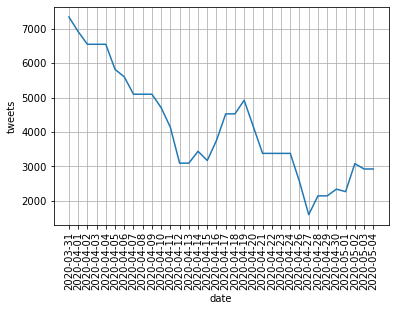

In [181]:
import matplotlib.pyplot as plt

data = date_mavg.collect()
x = [p[0] for p in data]
y = [p[1] for p in data]

plt.xlabel("date")
plt.ylabel("tweets")
plt.xticks(rotation=90)
plt.grid()
plt.plot(x, y)

In [184]:
date_mavg.collect()

[('2020-03-31', 7342.0),
 ('2020-04-01', 6919.0),
 ('2020-04-02', 6549.333333333333),
 ('2020-04-03', 6549.333333333333),
 ('2020-04-04', 6549.333333333333),
 ('2020-04-05', 5820.333333333333),
 ('2020-04-06', 5603.333333333333),
 ('2020-04-07', 5099.0),
 ('2020-04-08', 5099.0),
 ('2020-04-09', 5099.0),
 ('2020-04-10', 4706.666666666667),
 ('2020-04-11', 4137.5),
 ('2020-04-12', 3096.5),
 ('2020-04-13', 3096.5),
 ('2020-04-14', 3441.3333333333335),
 ('2020-04-15', 3173.0),
 ('2020-04-16', 3756.6666666666665),
 ('2020-04-17', 4527.5),
 ('2020-04-18', 4527.5),
 ('2020-04-19', 4924.0),
 ('2020-04-20', 4152.0),
 ('2020-04-21', 3380.0),
 ('2020-04-22', 3380.0),
 ('2020-04-23', 3380.0),
 ('2020-04-24', 3380.0),
 ('2020-04-26', 2560.0),
 ('2020-04-27', 1600.0),
 ('2020-04-28', 2146.3333333333335),
 ('2020-04-29', 2146.3333333333335),
 ('2020-04-30', 2341.5),
 ('2020-05-01', 2268.6666666666665),
 ('2020-05-02', 3083.0),
 ('2020-05-03', 2927.0),
 ('2020-05-04', 2927.0)]

## Question 3

In [245]:
tweets.filter("created_at like '%-%-%T%:%:%Z' and account_created_at like '%-%-%T%:%:%Z'").limit(20).toPandas()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1244776423593775105,860252856829587457,2020-03-31T00:00:00Z,IMSS_SanLuis,Para prevenir el COVID-19 la distancia es impo...,TweetDeck,None,None,None,FALSE,FALSE,300,0,None,None,None,1012,41,None,2017-05-04T22:00:38Z,FALSE,es
1,1244776422582833154,44728980,2020-03-31T00:00:00Z,ANCALERTS,Here are some tips on how you can best protect...,Twitter Media Studio,None,None,None,FALSE,FALSE,5450,3,None,None,None,4873740,776,None,2009-06-04T21:26:24Z,TRUE,en
2,1244776421257629698,44728980,2020-03-31T00:00:00Z,ANCALERTS,New York welcomes hospital ship as coronavirus...,TweetDeck,None,None,None,FALSE,FALSE,5450,5,None,None,None,4873740,776,None,2009-06-04T21:26:24Z,TRUE,en
3,1244776421274406914,132225222,2020-03-31T00:00:00Z,SSalud_mx,#ConferenciaDePrensa sobre el #Coronavirus #CO...,TweetDeck,None,None,None,FALSE,FALSE,3959,139,None,None,None,838824,213,None,2010-04-12T16:53:45Z,TRUE,es
4,1244776420825587712,3233932080,2020-03-31T00:00:00Z,inoticias_mx,#Tamaulipas | Al confirmar el octavo caso posi...,TweetDeck,None,None,None,FALSE,FALSE,32,0,None,None,None,386,283,None,2015-06-02T18:59:56Z,FALSE,es
5,1244776423685902337,1479764881,2020-03-31T00:00:00Z,BrasilEFE,"""#Fernandez lamenta que #Bolsonaro """"não enten...",TweetDeck,None,None,None,FALSE,FALSE,60,0,None,None,None,6071,416,None,2013-06-03T13:45:04Z,TRUE,pt
6,1244776423010832385,171548670,2020-03-31T00:00:00Z,RadioNLNews,BC's Health Minister @adriandix says there are...,TweetDeck,None,None,None,FALSE,FALSE,499,1,None,None,None,6932,2137,None,2010-07-27T16:17:02Z,FALSE,en
7,1244776423170007040,388366218,2020-03-31T00:00:00Z,AbortoPORlaVIDA,Iniciamos marcha virtual. Por nuestra dignidad...,TweetDeck,None,None,None,FALSE,FALSE,5169,3,None,None,None,8531,2845,None,2011-10-10T16:41:14Z,FALSE,es
8,1244776421110747138,2994027541,2020-03-31T00:00:00Z,TomatazosCom,#JamesMcAvoy realiza increíble donación para c...,TweetDeck,None,None,None,FALSE,FALSE,30090,5,None,None,None,54230,27379,None,2015-01-24T01:09:18Z,TRUE,es
9,1244776422574624768,621185967,2020-03-31T00:00:00Z,MAAWLAW,“... emergency measures designed to tackle #CO...,Twitter for iPhone,None,None,None,TRUE,FALSE,7292,0,None,None,None,3396,904,None,2012-06-28T16:06:57Z,FALSE,en


In [248]:
tweets.filter("created_at like '%-%-%T%:%:%Z' and account_created_at like '%-%-%T%:%:%Z'").count()

3261804

In [249]:
tweets_q3_df = tweets.filter("created_at like '%-%-%T%:%:%Z' and account_created_at like '%-%-%T%:%:%Z'")

In [250]:
tweets_q3_df = tweets_q3_df.withColumn("followers_count_int", f.col("followers_count").cast("int"))
tweets_q3_users_df = tweets_q3_df.groupBy("user_id").agg(f.min("followers_count_int").alias('min'), f.max("followers_count_int").alias('max'), f.count("*").alias("count"))

lit

In [251]:
tweets_q3_users_df = tweets_q3_users_df.withColumn('growth', tweets_q3_users_df['max'] - tweets_q3_users_df['min'])

In [256]:
top_100_active_df = tweets_q3_users_df.sort("count", ascending=False).limit(100)

In [257]:
top_100_active_df.toPandas()

,user_id,min,max,count,growth
0,4913320595,29334,29729,8643,395
1,717039627916484608,972,999,3886,27
2,231726084,5376,5421,3856,45
3,1198228761910611969,182,526,3460,344
4,301831339,479373,485889,2489,6516
...,...,...,...,...,...
95,412597196,2925,3097,456,172
96,2220340166,10996,11276,455,280
97,368889720,106232,114329,449,8097
98,67039054,83055,85169,445,2114


In [258]:
top_100_growth_df = tweets_q3_users_df.sort("growth", ascending=False).limit(100)

In [259]:
top_100_growth_df.toPandas()

,user_id,min,max,count,growth
0,3171712086,12930400,13649972,5,719572
1,759251,46692373,47402413,8,710040
2,14499829,6950550,7637195,48,686645
3,1154180084078501889,315912,896488,57,580576
4,122658025,4024406,4496280,3,471874
...,...,...,...,...,...
95,74457733,121848,210219,6,88371
96,88716854,521508,609855,16,88347
97,373978904,1246229,1334528,83,88299
98,1943418931,455951,543944,809,87993


In [264]:
inner_join = top_100_active_df.alias('ta').join(top_100_growth_df.alias('tg'), f.col('ta.user_id') == f.col('tg.user_id'))

In [265]:
inner_join.select("ta.user_id").show()

+-------------------+
|            user_id|
+-------------------+
|           15872418|
|          355989081|
|1214315619031478272|
|         1943418931|
|           37034483|
|            7587032|
+-------------------+



## Question 4

In [111]:
tweets_all = tweets.select(f.concat_ws(' ', *tweets.schema.names).alias("all")).select("all")

tweets_all.limit(5).toPandas()

,all
0,1244776423073542144 2722502906 2020-03-31T00:0...
1,🎾 https://t.co/SldPvrP81A https://t.co/7x8W8Mw...
2,1244776423593775105 860252856829587457 2020-03...
3,1244776422037692417 24969337 2020-03-31T00:00:...
4,La opinión de Federico @Berrueto en #MILENIOAl...


In [112]:
from pyspark.ml.feature import Tokenizer, RegexTokenizer

tokenizer = Tokenizer(inputCol="all", outputCol="tokens")

tokens_df = tokenizer.transform(tweets_all).select("tokens")

tokens_df.limit(5).toPandas()

,tokens
0,"[1244776423073542144, 2722502906, 2020-03-31t0..."
1,"[🎾, https://t.co/sldpvrp81a, https://t.co/7x8w..."
2,"[1244776423593775105, 860252856829587457, 2020..."
3,"[1244776422037692417, 24969337, 2020-03-31t00:..."
4,"[la, opinión, de, federico, @berrueto, en, #mi..."


In [113]:
all_tokens_df = tokens_df.withColumn("all_tokens", f.explode(f.col('tokens'))).select("all_tokens")
all_tokens_df.limit(10).toPandas()

,all_tokens
0,1244776423073542144
1,2722502906
2,2020-03-31t00:00:00z
3,gradanortemx
4,cuando
5,mejor
6,iban
7,las
8,cosas
9,en


In [114]:
hashtags_df = all_tokens_df.filter("all_tokens like '#%'")

hashtags_df.groupBy("all_tokens")\
    .count()\
    .sort('count', ascending=False)\
    .limit(15)\
    .toPandas()

,all_tokens,count
0,#covid19,3058625
1,#coronavirus,2398696
2,#covid_19,759461
3,#covid19.,178496
4,#covidー19,159945
5,#stayhome,140493
6,"#covid19""",126408
7,#coronaviruspandemic,125642
8,#stayhomestaysafe,122811
9,#lockdown,116428


**HOW TO USE TOKENIZER ^^^**

BELOW I'M FOLLOWING: https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/3741049972324885/3783546674231782/4413065072037724/latest.html

In [115]:
tweets_q4_text = tweets.filter("created_at like '2020-%' and country_code = 'US'").select("text")

tweets_q4_text.limit(10).toPandas()

,text
0,Mayor @KeishaBottoms to WH on #COVID19 - “Allo...
1,#cdc #Coronavirustruth #COVID19 #StayHome #Tig...
2,Big trip 5 mi to north...checked out Yountvill...
3,Nurses are being threatened and disciplined fo...
4,I think that @GovRonDeSantis is handling this ...
5,I don’t know if @Travistritt is taking request...
6,#RealHeroes Thank You. 🙏🏻💪🏻 👩‍⚕️ 👨‍⚕️ #COVID19...
7,Shits gettin real... #COVID19 #Covid_19 #coron...
8,People this is not a drill! #NYC and the #Emp...
9,Thank you @WVTM13 Bham for having me on tonigh...


In [116]:
tweets_q4_text.count()

54718

In [117]:
from pyspark.ml.feature import Tokenizer, RegexTokenizer

tokenizer = RegexTokenizer(inputCol="text", outputCol="tokens", pattern="([#@]\\S*|\\W|https)", minTokenLength=4)

tweets_q4_tokens_df = tokenizer.transform(tweets_q4_text).select("tokens")

tweets_q4_tokens_df.limit(5).toPandas()

,tokens
0,"[mayor, allow, science, speak, itself, 34qioia..."
1,[z0k0b7sz8f]
2,"[trip, north, checked, yountville, another, gh..."
3,"[nurses, being, threatened, disciplined, advoc..."
4,"[think, that, handling, this, well, wide, geog..."


In [118]:
from pyspark.ml.feature import StopWordsRemover

locale = sc._jvm.java.util.Locale
locale.setDefault(locale.forLanguageTag("en-US"))

remover = StopWordsRemover(inputCol="tokens", outputCol="tokens_filtered")
tokens_filtered_df = remover.transform(tweets_q4_tokens_df).select("tokens_filtered")

tokens_filtered_df.limit(20).toPandas()

,tokens_filtered
0,"[mayor, allow, science, speak, 34qioiaqbd]"
1,[z0k0b7sz8f]
2,"[trip, north, checked, yountville, another, gh..."
3,"[nurses, threatened, disciplined, advocating, ..."
4,"[think, handling, well, wide, geographical, sp..."
5,"[know, taking, requests, online, engagements, ..."
6,"[thank, eu2qimvb58]"
7,"[shits, gettin, real, dtnbjt324s]"
8,"[people, drill, flashing, white, siren, lights..."
9,"[thank, bham, tonight, discuss, need, disregar..."


In [119]:
vocab_df = tokens_filtered_df.withColumn("vocab", f.explode(f.col('tokens_filtered'))).select("vocab").distinct()
vocab_df.count()

75147

In [120]:
tokens_filtered_df = tokens_filtered_df.withColumn("id", f.monotonically_increasing_id())
tokens_filtered_df.limit(5).toPandas()

,tokens_filtered,id
0,"[mayor, allow, science, speak, 34qioiaqbd]",0
1,[z0k0b7sz8f],1
2,"[trip, north, checked, yountville, another, gh...",2
3,"[nurses, threatened, disciplined, advocating, ...",3
4,"[think, handling, well, wide, geographical, sp...",4


In [121]:
from pyspark.ml.feature import CountVectorizer

cv = CountVectorizer(inputCol="tokens_filtered", outputCol="features", vocabSize=vocab_df.count())
cv_model = cv.fit(tokens_filtered_df)

count_vectors = cv_model.transform(tokens_filtered_df).select("id", "features")

count_vectors.limit(10).toPandas()

,id,features
0,0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,5,"(0.0, 3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
6,6,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,7,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,8,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,9,"(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, ..."


In [122]:
from pyspark.ml.clustering import LDA

lda = LDA(k=3, maxIter=10)
lda_model = lda.fit(count_vectors)

In [125]:
def print_topics(lda_model, cv_model, vocab_list):
    topic_indices = lda_model.describeTopics(5)
    vocab_list = cv_model.vocabulary
    topics = topic_indices.rdd.map(lambda t: zip([vocab_list[ti] for ti in t.termIndices], t.termWeights))

    for topic in topics.collect():
        for term, weight in topic:
            print(term, weight)
        print()

In [127]:
print_topics(LDA(k=3, maxIter=3, optimizer="em").fit(count_vectors), cv_model, vocab_list)

people 0.00790512954344521
like 0.004957818115267787
time 0.0049494596568304735
today 0.004571424093938345
home 0.004422119162118786

people 0.00783005706500554
time 0.004888032094499426
like 0.004806208300685571
today 0.00452269988496063
home 0.004440673111599201

people 0.008029126300232298
like 0.005017388814021677
time 0.0048422910404846056
today 0.0045806594037075855
home 0.004507103192057243



In [128]:
print_topics(LDA(k=3, maxIter=3, optimizer="online").fit(count_vectors), cv_model, vocab_list)

people 0.002317807838299697
like 0.0018971608698075237
home 0.001487441525337263
time 0.0012488229249116136
help 0.0012340237127395637

people 0.001175307187752383
pandemic 0.0005819145928676499
time 0.0003712924165086458
know 0.00036855790728365574
right 0.00036038076214848895

today 0.0009598164067028994
need 0.0008319957660099655
people 0.0007261323306875982
time 0.0007028056357725736
home 0.0006999472637258477



In [129]:
print_topics(LDA(k=3, maxIter=10, optimizer="em").fit(count_vectors), cv_model, vocab_list)

people 0.007885155931504765
time 0.004962844800359664
like 0.004962247869948823
today 0.004572987405939112
home 0.004407453683007909

people 0.007830611904393965
time 0.0048819317753962125
like 0.004785891512329553
today 0.0045088222197365285
home 0.004448085052955089

people 0.008048540039394524
like 0.005033273724875149
time 0.004835010030740355
today 0.0045929733322217685
home 0.004514353446212596



In [130]:
print_topics(LDA(k=3, maxIter=10, optimizer="online").fit(count_vectors), cv_model, vocab_list)

people 0.005362170828488279
like 0.003635986647734271
home 0.0031585253092511283
time 0.0031341039975186957
today 0.0030621019148912997

people 0.001879302760718431
next 0.001090319282410925
debt 0.001085151341360414
urge 0.001083333947228
student 0.0010790763919189639

today 0.0010020692878179149
para 0.0009994170293943744
need 0.000811166688420653
time 0.0007710908277000331
home 0.0007185586817702621



In [131]:
print_topics(LDA(k=3, maxIter=30, optimizer="em").fit(count_vectors), cv_model, vocab_list)

people 0.007704558592584462
like 0.004926373422086212
time 0.004915616764665652
today 0.00453599723857988
home 0.004253657542597214

people 0.007821671429133138
time 0.005031916937520875
like 0.004703096940729503
home 0.0046388290297588695
today 0.004445932389080807

people 0.008237777396689846
like 0.005151825120842498
time 0.004732347122889358
today 0.004692768981910273
home 0.004477267308589743



In [132]:
print_topics(LDA(k=3, maxIter=30, optimizer="online").fit(count_vectors), cv_model, vocab_list)

people 0.007015666082705946
like 0.004635668091723862
time 0.004429573641456834
home 0.004114737026536918
today 0.004096175762254164

people 0.0032267352274709497
package 0.0028768798127419104
debt 0.0028696810416986617
student 0.0028301841360675786
urge 0.002799907109617262

para 0.0030995494934747255
esta 0.0010783778154674385
every 0.0009755411995982318
sign 0.0009727327061588149
como 0.0009218928100922346



In [133]:
print_topics(LDA(k=3, maxIter=3).fit(count_vectors), cv_model, vocab_list)

people 0.002317807838299697
like 0.0018971608698075237
home 0.001487441525337263
time 0.0012488229249116136
help 0.0012340237127395637

people 0.001175307187752383
pandemic 0.0005819145928676499
time 0.0003712924165086458
know 0.00036855790728365585
right 0.00036038076214848895

today 0.0009598164067028994
need 0.0008319957660099655
people 0.000726132330687598
time 0.0007028056357725736
home 0.0006999472637258477



In [134]:
print_topics(LDA(k=3, maxIter=10).fit(count_vectors), cv_model, vocab_list)

people 0.005362170828488278
like 0.003635986647734272
home 0.0031585253092511283
time 0.0031341039975186957
today 0.0030621019148912997

people 0.001879302760718431
next 0.001090319282410925
debt 0.001085151341360414
urge 0.001083333947228
student 0.0010790763919189639

today 0.0010020692878179149
para 0.0009994170293943744
need 0.000811166688420653
time 0.0007710908277000327
home 0.0007185586817702621



In [135]:
print_topics(LDA(k=3, maxIter=30).fit(count_vectors), cv_model, vocab_list)

people 0.007015666082705946
like 0.004635668091723862
time 0.004429573641456834
home 0.004114737026536918
today 0.004096175762254164

people 0.0032267352274709497
package 0.0028768798127419104
debt 0.0028696810416986617
student 0.0028301841360675786
urge 0.002799907109617262

para 0.0030995494934747264
esta 0.0010783778154674387
every 0.0009755411995982321
sign 0.0009727327061588154
como 0.0009218928100922348

